In [1]:
!pip install pyspark
import pyspark
from pyspark.sql import SparkSession


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 45 kB/s 
     |████████████████████████████████| 199 kB 52.8 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845514 sha256=4d609a97c03129242282d8ee1eb7c9ac8c9d6f01ddd6b07422abf3bb9842be92
  Stored in directory: /root/.cache/pip/wheels/42/59/f5/79a5bf931714dcd201b26025347785f087370a10a3329a899c
Successfully built pyspark


In [3]:
spark = SparkSession.builder.appName("answers").getOrCreate()

path = "BostonHousing.csv"

df = spark.read.option("header",'True').option('delimiter', ',').csv(path)
df.printSchema()

root
 |-- crim: string (nullable = true)
 |-- zn: string (nullable = true)
 |-- indus: string (nullable = true)
 |-- chas: string (nullable = true)
 |-- nox: string (nullable = true)
 |-- rm: string (nullable = true)
 |-- age: string (nullable = true)
 |-- dis: string (nullable = true)
 |-- rad: string (nullable = true)
 |-- tax: string (nullable = true)
 |-- ptratio: string (nullable = true)
 |-- b: string (nullable = true)
 |-- lstat: string (nullable = true)
 |-- medv: string (nullable = true)



In [5]:
df.show(5)

+-------+---+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim| zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+---+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632| 18| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|  24|
|0.02731|  0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729|  0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237|  0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905|  0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+---+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
only showing top 5 rows



In [7]:
df.count()

506

In [8]:
df.printSchema()

root
 |-- crim: string (nullable = true)
 |-- zn: string (nullable = true)
 |-- indus: string (nullable = true)
 |-- chas: string (nullable = true)
 |-- nox: string (nullable = true)
 |-- rm: string (nullable = true)
 |-- age: string (nullable = true)
 |-- dis: string (nullable = true)
 |-- rad: string (nullable = true)
 |-- tax: string (nullable = true)
 |-- ptratio: string (nullable = true)
 |-- b: string (nullable = true)
 |-- lstat: string (nullable = true)
 |-- medv: string (nullable = true)



In [11]:
df = df.drop('b')
df.show(5)

+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+----+
|   crim| zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|lstat|medv|
+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+----+
|0.00632| 18| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 4.98|  24|
|0.02731|  0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 9.14|21.6|
|0.02729|  0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8| 4.03|34.7|
|0.03237|  0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7| 2.94|33.4|
|0.06905|  0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 5.33|36.2|
+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+----+
only showing top 5 rows



In [16]:
from pyspark.sql.functions import round,col
for c in df.columns:
  df = df.withColumn(c,round(c,2))
df.show(5)

+----+----+-----+----+----+----+----+----+---+-----+-------+-----+----+
|crim|  zn|indus|chas| nox|  rm| age| dis|rad|  tax|ptratio|lstat|medv|
+----+----+-----+----+----+----+----+----+---+-----+-------+-----+----+
|0.01|18.0| 2.31| 0.0|0.54|6.58|65.2|4.09|1.0|296.0|   15.3| 4.98|24.0|
|0.03| 0.0| 7.07| 0.0|0.47|6.42|78.9|4.97|2.0|242.0|   17.8| 9.14|21.6|
|0.03| 0.0| 7.07| 0.0|0.47|7.19|61.1|4.97|2.0|242.0|   17.8| 4.03|34.7|
|0.03| 0.0| 2.18| 0.0|0.46| 7.0|45.8|6.06|3.0|222.0|   18.7| 2.94|33.4|
|0.07| 0.0| 2.18| 0.0|0.46|7.15|54.2|6.06|3.0|222.0|   18.7| 5.33|36.2|
+----+----+-----+----+----+----+----+----+---+-----+-------+-----+----+
only showing top 5 rows



In [18]:
df = df.withColumn("Age10", df.age*1.10)
df.show(5)

+----+----+-----+----+----+----+----+----+---+-----+-------+-----+----+------------------+
|crim|  zn|indus|chas| nox|  rm| age| dis|rad|  tax|ptratio|lstat|medv|             Age10|
+----+----+-----+----+----+----+----+----+---+-----+-------+-----+----+------------------+
|0.01|18.0| 2.31| 0.0|0.54|6.58|65.2|4.09|1.0|296.0|   15.3| 4.98|24.0| 71.72000000000001|
|0.03| 0.0| 7.07| 0.0|0.47|6.42|78.9|4.97|2.0|242.0|   17.8| 9.14|21.6|             86.79|
|0.03| 0.0| 7.07| 0.0|0.47|7.19|61.1|4.97|2.0|242.0|   17.8| 4.03|34.7| 67.21000000000001|
|0.03| 0.0| 2.18| 0.0|0.46| 7.0|45.8|6.06|3.0|222.0|   18.7| 2.94|33.4|             50.38|
|0.07| 0.0| 2.18| 0.0|0.46|7.15|54.2|6.06|3.0|222.0|   18.7| 5.33|36.2|59.620000000000005|
+----+----+-----+----+----+----+----+----+---+-----+-------+-----+----+------------------+
only showing top 5 rows



In [19]:
df = df.withColumn("Age10",col("Age10").cast("integer"))
agelist = df.select("Age10")
agelist

DataFrame[Age10: int]

In [20]:
agelist=df.select("age").rdd.flatMap(lambda x: x).collect()


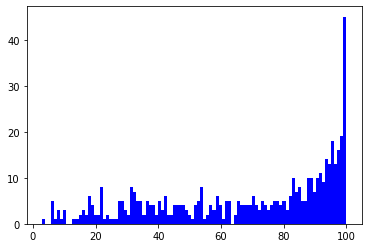

In [22]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
num_bins = 100
n, bins, patches = plt.hist(agelist,
                            num_bins,
                            facecolor = 'blue')

In [23]:
df.summary().show()

+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+
|summary|              crim|                zn|             indus|              chas|               nox|                rm|               age|               dis|              rad|               tax|           ptratio|             lstat|              medv|             Age10|
+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+
|  count|               506|               506|               506|               506|               506|               506|               506|               506|              

In [24]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()
df.show(5)

+----+----+-----+----+----+----+----+----+---+-----+-------+-----+----+-----+
|crim|  zn|indus|chas| nox|  rm| age| dis|rad|  tax|ptratio|lstat|medv|Age10|
+----+----+-----+----+----+----+----+----+---+-----+-------+-----+----+-----+
|0.01|18.0| 2.31| 0.0|0.54|6.58|65.2|4.09|1.0|296.0|   15.3| 4.98|24.0|   71|
|0.03| 0.0| 7.07| 0.0|0.47|6.42|78.9|4.97|2.0|242.0|   17.8| 9.14|21.6|   86|
|0.03| 0.0| 7.07| 0.0|0.47|7.19|61.1|4.97|2.0|242.0|   17.8| 4.03|34.7|   67|
|0.03| 0.0| 2.18| 0.0|0.46| 7.0|45.8|6.06|3.0|222.0|   18.7| 2.94|33.4|   50|
|0.07| 0.0| 2.18| 0.0|0.46|7.15|54.2|6.06|3.0|222.0|   18.7| 5.33|36.2|   59|
+----+----+-----+----+----+----+----+----+---+-----+-------+-----+----+-----+
only showing top 5 rows



In [26]:
df_pd = df.toPandas()
df_pd

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,Age10
0,0.01,18.0,2.31,0.0,0.54,6.58,65.2,4.09,1.0,296.0,15.3,4.98,24.0,71
1,0.03,0.0,7.07,0.0,0.47,6.42,78.9,4.97,2.0,242.0,17.8,9.14,21.6,86
2,0.03,0.0,7.07,0.0,0.47,7.19,61.1,4.97,2.0,242.0,17.8,4.03,34.7,67
3,0.03,0.0,2.18,0.0,0.46,7.00,45.8,6.06,3.0,222.0,18.7,2.94,33.4,50
4,0.07,0.0,2.18,0.0,0.46,7.15,54.2,6.06,3.0,222.0,18.7,5.33,36.2,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06,0.0,11.93,0.0,0.57,6.59,69.1,2.48,1.0,273.0,21.0,9.67,22.4,76
502,0.05,0.0,11.93,0.0,0.57,6.12,76.7,2.29,1.0,273.0,21.0,9.08,20.6,84
503,0.06,0.0,11.93,0.0,0.57,6.98,91.0,2.17,1.0,273.0,21.0,5.64,23.9,100
504,0.11,0.0,11.93,0.0,0.57,6.79,89.3,2.39,1.0,273.0,21.0,6.48,22.0,98


In [27]:
df_pd.tail

df_pd.tail(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,Age10
501,0.06,0.0,11.93,0.0,0.57,6.59,69.1,2.48,1.0,273.0,21.0,9.67,22.4,76
502,0.05,0.0,11.93,0.0,0.57,6.12,76.7,2.29,1.0,273.0,21.0,9.08,20.6,84
503,0.06,0.0,11.93,0.0,0.57,6.98,91.0,2.17,1.0,273.0,21.0,5.64,23.9,100
504,0.11,0.0,11.93,0.0,0.57,6.79,89.3,2.39,1.0,273.0,21.0,6.48,22.0,98
505,0.05,0.0,11.93,0.0,0.57,6.03,80.8,2.51,1.0,273.0,21.0,7.88,11.9,88
